In [1]:
# 인스타그램 접속 후 로그인하기
from selenium import webdriver

driver = webdriver.Chrome('./chromedriver.exe')

<ipython-input-1-9fe9695c39db>:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('./chromedriver.exe')


In [2]:
import time

#인스타그램 접속하기
driver.get('https://www.instagram.com')
time.sleep(2)

In [3]:
#인스타그램 로그인하기
import time

email = '인스타그램 아이디'
input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]
input_id.clear()
input_id.send_keys(email)

password = '인스타그램 비밀번호'
input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]
input_pw.clear()
input_pw.send_keys(password)
input_pw.submit()
time.sleep(3)

<ipython-input-3-188b2698b253>:5: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]
<ipython-input-3-188b2698b253>:10: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]


In [4]:
#인스타그램의 검색 결과 url을 만드는 함수
def insta_searching(word):
    url = 'https://www.instagram.com/explore/tags/' + word
    return url

In [5]:
#검색 결과 페이지 접속하기
word = '제주도맛집'
url = insta_searching(word)
driver.get(url)

In [7]:
#첫 번째 게시글 클릭 함수 만들기
def select_first(driver):
    first = driver.find_element_by_css_selector('div._aagu')
    first.click()
    time.sleep(3)
    
select_first(driver)

<ipython-input-7-359e714cb92a>:3: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  first = driver.find_element_by_css_selector('div._aagu')


In [8]:
#현재 html 정보 가져오기
from bs4 import BeautifulSoup

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

print(soup)

<html class="_9dls js-focus-visible _aa4c" data-js-focus-visible="" dir="ltr" lang="ko" style="--in-feed-story-item-padding:12px; --desktop-nav-height:60px;"><head><link data-default-icon="https://static.cdninstagram.com/rsrc.php/v3/y9/r/uhXzVt-dlj4.png" href="https://static.cdninstagram.com/rsrc.php/v3/y9/r/uhXzVt-dlj4.png" rel="icon" sizes="192x192"/><meta content="noarchive, noimageindex" name="robots"/><meta charset="utf-8"/><meta content="default" name="apple-mobile-web-app-status-bar-style"/><meta content="yes" name="mobile-web-app-capable"/><meta content="width=device-width, initial-scale=1, minimum-scale=1, maximum-scale=2, viewport-fit=cover" id="viewport" name="viewport"/><meta content="#ffffff" name="theme-color"/><link href="https://static.cdninstagram.com/rsrc.php/v3/y-/r/99-GUnvE0f7.png" rel="apple-touch-icon" sizes="76x76"/><link href="https://static.cdninstagram.com/rsrc.php/v3/y0/r/1RQf-TYXzi3.png" rel="apple-touch-icon" sizes="120x120"/><link href="https://static.cdni

In [9]:
#본문 내용 가져오기
import unicodedata

try:
    content = soup.select('div._a9zr > div._a9zs > span')[0].text
    content = unicodedata.normalize('NFC', content) 
except:
    content = ''
    
content

'🤠카우보이 스테이크 하우스🤠이국적이고 고풍스러운 분위기의제주도 양식 찐 맛집💗아기자기한 분위기에서 즐기는이국적인 음식들의 향현💞미국생활 하시다 오신 사장님의손맛으로 본토맛 뿜뿜😆육즙가득! 두툼한 스테이크랑꾸덕꾸덕 파스타 한입이면바로 외국여행온 기분 물씬✈✈매뉴 하나하나 다 맛있어서거를 타선이 없음 ㅠㅠ꼭 다 먹어봐야함👍👍제주여행 필수코스로내맘대로 지정해 버렸다💗💗🧭카우보이스테이크하우스064-792-1163제주 서귀포시 대정읍 영어도시로 77-5 1층#제주도맛집#제주신화월드맛집#제주스테이크#오설록맛집#오설록근처맛집#제주뽀로로테마파크맛집#제주카멜리아힐맛집#안덕면레스토랑#신화월드레스토랑#제주서쪽맛집#동광리맛집#더마파크맛집#제주981파크맛집#영어마을맛집#구억리맛집'

In [10]:
#본문 내용에서 해시태그 가져오기
import re

tags = re.findall(r'#[^\s#,\\]+', content)

tags

['#제주도맛집',
 '#제주신화월드맛집',
 '#제주스테이크',
 '#오설록맛집',
 '#오설록근처맛집',
 '#제주뽀로로테마파크맛집',
 '#제주카멜리아힐맛집',
 '#안덕면레스토랑',
 '#신화월드레스토랑',
 '#제주서쪽맛집',
 '#동광리맛집',
 '#더마파크맛집',
 '#제주981파크맛집',
 '#영어마을맛집',
 '#구억리맛집']

In [11]:
#작성일자 정보
date = soup.select('time._aaqe')[0]['datetime'][:10]

date

'2022-06-27'

In [12]:
#좋아요
like = soup.select('div._aacl._aaco._aacw._aacx._aada._aade')[0].text

like

'여러 명'

In [13]:
#위치 정보
try:
    place = soup.select('div._aaqm')[0].text
    place = unicodedata.normalize('NFC', place)
except:
    place = ' '

In [14]:
import re
from bs4 import BeautifulSoup
import unicodedata

def get_content(driver):
    # 1. 현재 페이지의 html 정보 가져오기
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')
    
    # 2. 본문 내용 가져오기
    try:
        content = soup.select('div._a9zr > div._a9zs > span')[0].text
        content = unicodedata.normalize('NFC', content) 
    except:
        content = ''
        
    # 3. 본문 내용에서 해시태그 가져오기(정규식 활용)
    tags = re.findall(r'#[^\s#,\\]+', content)
    
    # 4. 작성일자 정보 가져오기
    date = soup.select('time._aaqe')[0]['datetime'][:10]
    
    # 5. 좋아요 수 가져오기
    try:
        like = soup.select('div._aacl._aaco._aacw._aacx._aada._aade')[0].text
    except:
        like = 0
        
    # 6. 위치정보 가져오기
    try:
        place = soup.select('div._aaqm')[0].text
        place = unicodedata.normalize('NFC', place)
    except:
        place = ' '
        
    # 7. 수집한 정보 저장하기
    data = [content, date, like, place, tags]
    return data

get_content(driver)

['🤠카우보이 스테이크 하우스🤠이국적이고 고풍스러운 분위기의제주도 양식 찐 맛집💗아기자기한 분위기에서 즐기는이국적인 음식들의 향현💞미국생활 하시다 오신 사장님의손맛으로 본토맛 뿜뿜😆육즙가득! 두툼한 스테이크랑꾸덕꾸덕 파스타 한입이면바로 외국여행온 기분 물씬✈✈매뉴 하나하나 다 맛있어서거를 타선이 없음 ㅠㅠ꼭 다 먹어봐야함👍👍제주여행 필수코스로내맘대로 지정해 버렸다💗💗🧭카우보이스테이크하우스064-792-1163제주 서귀포시 대정읍 영어도시로 77-5 1층#제주도맛집#제주신화월드맛집#제주스테이크#오설록맛집#오설록근처맛집#제주뽀로로테마파크맛집#제주카멜리아힐맛집#안덕면레스토랑#신화월드레스토랑#제주서쪽맛집#동광리맛집#더마파크맛집#제주981파크맛집#영어마을맛집#구억리맛집',
 '2022-06-27',
 '여러 명',
 '',
 ['#제주도맛집',
  '#제주신화월드맛집',
  '#제주스테이크',
  '#오설록맛집',
  '#오설록근처맛집',
  '#제주뽀로로테마파크맛집',
  '#제주카멜리아힐맛집',
  '#안덕면레스토랑',
  '#신화월드레스토랑',
  '#제주서쪽맛집',
  '#동광리맛집',
  '#더마파크맛집',
  '#제주981파크맛집',
  '#영어마을맛집',
  '#구억리맛집']]

In [15]:
#다음 게시글 열기
def move_next(driver):
    right = driver.find_element_by_css_selector('div._aaqg._aaqh')
    right.click()
    time.sleep(3)
    
move_next(driver)

<ipython-input-15-55c8e79c9cd3>:3: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  right = driver.find_element_by_css_selector('div._aaqg._aaqh')


In [16]:
### 인스타그램 검색 크롤링 정리하기

from selenium import webdriver
from bs4 import BeautifulSoup
import time
import re

# 1. 크롬 브라우저 열기 및 로그인
driver = webdriver.Chrome('./chromedriver.exe')
driver.get('https://www.instagram.com')
time.sleep(2)

#로그인 진행
email = '인스타그램 아이디 입력'
input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]
input_id.clear()
input_id.send_keys(email)

password = '인스타그램 비밀번호 입력'
input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]
input_pw.clear()
input_pw.send_keys(password)
input_pw.submit()
time.sleep(3)

# 2. 인스타그램 검색 페이지 URL 만들기
word = '제주도맛집'
url = insta_searching(word)

# 3. 검색 페이지 접속
driver.get(url)
time.sleep(8)

# 4. 첫 번째 게시글 열기
select_first(driver)

# 5. 비어있는 변수(results) 만들기
results = [ ]

# 6-7->8-> 여러 게시물 수집하기
target = 50  #크롤링할 게시글 수
for i in range(target):
    # 게시글 수집에 오류 발생 시 2초 대기 후
    # 다음 게시글로 넘어가도록 try, except 구문을 활용
    try:
        data = get_content(driver)  #게시글 정보 가져오기
        results.append(data)
        move_next(driver)
    except:
        time.sleep(2)
        move_next(driver)
        
print(results[:2])

<ipython-input-16-8b5b67a02cba>:9: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('./chromedriver.exe')
<ipython-input-16-8b5b67a02cba>:15: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]
<ipython-input-16-8b5b67a02cba>:20: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]
<ipython-input-7-359e714cb92a>:3: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  first = driver.find_element_by_css_selector('div._aagu')


WebDriverException: Message: chrome not reachable
  (Session info: chrome=102.0.5005.115)
Stacktrace:
Backtrace:
	Ordinal0 [0x0084B8F3+2406643]
	Ordinal0 [0x007DAF31+1945393]
	Ordinal0 [0x006CC610+837136]
	Ordinal0 [0x006C0442+787522]
	Ordinal0 [0x006C0C78+789624]
	Ordinal0 [0x006C24B2+795826]
	Ordinal0 [0x006BBF09+769801]
	Ordinal0 [0x006CDAC0+842432]
	Ordinal0 [0x00723E62+1195618]
	Ordinal0 [0x00714096+1130646]
	Ordinal0 [0x006EE636+976438]
	Ordinal0 [0x006EF546+980294]
	GetHandleVerifier [0x00AB9612+2498066]
	GetHandleVerifier [0x00AAC920+2445600]
	GetHandleVerifier [0x008E4F2A+579370]
	GetHandleVerifier [0x008E3D36+574774]
	Ordinal0 [0x007E1C0B+1973259]
	Ordinal0 [0x007E6688+1992328]
	Ordinal0 [0x007E6775+1992565]
	Ordinal0 [0x007EF8D1+2029777]
	BaseThreadInitThunk [0x758E6739+25]
	RtlGetFullPathName_UEx [0x773C8FEF+1215]
	RtlGetFullPathName_UEx [0x773C8FBD+1165]


In [40]:
#수집한 데이터 저장
import pandas as pd

results_df = pd.DataFrame(results)
results_df.columns = ['content', 'data', 'like', 'place', 'tags']
results_df.to_excel('./files/insta/1_crawling_jejudoMatJip.xlsx', index=False)

In [49]:
# '제주도관광' 검색

from selenium import webdriver
from bs4 import BeautifulSoup
import time
import re

# 1. 크롬 브라우저 열기 및 로그인
driver = webdriver.Chrome('./chromedriver.exe')
driver.get('https://www.instagram.com')
time.sleep(2)

#로그인 진행
email = '인스타그램 아이디'
input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]
input_id.clear()
input_id.send_keys(email)

password = '인스타그램 비밀번호'
input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]
input_pw.clear()
input_pw.send_keys(password)
input_pw.submit()
time.sleep(3)

# 2. 인스타그램 검색 페이지 URL 만들기
word = '제주도관광'
url = insta_searching(word)

# 3. 검색 페이지 접속
driver.get(url)
time.sleep(8)

# 4. 첫 번째 게시글 열기
select_first(driver)

# 5. 비어있는 변수(results) 만들기
results = [ ]

# 6-7->8-> 여러 게시물 수집하기
target = 50  #크롤링할 게시글 수
for i in range(target):
    # 게시글 수집에 오류 발생 시 2초 대기 후
    # 다음 게시글로 넘어가도록 try, except 구문을 활용
    try:
        data = get_content(driver)  #게시글 정보 가져오기
        results.append(data)
        move_next(driver)
    except:
        time.sleep(2)
        move_next(driver)
        
print(results[:2])

<ipython-input-49-773d775c8801>:9: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('./chromedriver.exe')
<ipython-input-49-773d775c8801>:15: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]
<ipython-input-49-773d775c8801>:20: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]
<ipython-input-30-359e714cb92a>:3: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  first = driver.find_element_by_css_selector('div._aagu')


[['제주도맛집 냠냠 🙂#제주도관광#애월맛집#우도맛집#제주현지인맛집#제주가볼만한곳#제주카페#제주도카페#제주도맛집#제주맛집', '2022-05-11', '여러 명', '', ['#제주도관광', '#애월맛집', '#우도맛집', '#제주현지인맛집', '#제주가볼만한곳', '#제주카페', '#제주도카페', '#제주도맛집', '#제주맛집']], ['국민의힘 김명만의원님제주의 극심한 관광객주차문제 주차난이 날로 악화되고 있는 과정속에서복합시설 대형주차장 뿐만 아니라 문화, 예술 , 스포츠 시설을 함께 설치해다양한 프로그램이 운영될 수 있도록 힘써주시는 의원님 감사합니다 !#제주카페#제주도카페#제주도맛집#제주맛집#제주가볼만한곳#제주도관광#애월맛집#우도맛집#제주현지인맛집', '2022-05-10', '여러 명', '', ['#제주카페', '#제주도카페', '#제주도맛집', '#제주맛집', '#제주가볼만한곳', '#제주도관광', '#애월맛집', '#우도맛집', '#제주현지인맛집']]]


In [50]:
#수집 데이터 저장
import pandas as pd

results_df = pd.DataFrame(results)
results_df.columns = ['content', 'data', 'like', 'place', 'tags']
results_df.to_excel('./files/insta/1_crawling__jejudoGwangFwang.xlsx', index=False)

In [53]:
# '제주맛집' 검색

from selenium import webdriver
from bs4 import BeautifulSoup
import time
import re

# 1. 크롬 브라우저 열기 및 로그인
driver = webdriver.Chrome('./chromedriver.exe')
driver.get('https://www.instagram.com')
time.sleep(2)

#로그인 진행
email = '인스타그램 아이디'
input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]
input_id.clear()
input_id.send_keys(email)

password = '인스타그램 비밀번호'
input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]
input_pw.clear()
input_pw.send_keys(password)
input_pw.submit()
time.sleep(3)

# 2. 인스타그램 검색 페이지 URL 만들기
word = '제주맛집'
url = insta_searching(word)

# 3. 검색 페이지 접속
driver.get(url)
time.sleep(8)

# 4. 첫 번째 게시글 열기
select_first(driver)

# 5. 비어있는 변수(results) 만들기
results = [ ]

# 6-7->8-> 여러 게시물 수집하기
target = 50  #크롤링할 게시글 수
for i in range(target):
    # 게시글 수집에 오류 발생 시 2초 대기 후
    # 다음 게시글로 넘어가도록 try, except 구문을 활용
    try:
        data = get_content(driver)  #게시글 정보 가져오기
        results.append(data)
        move_next(driver)
    except:
        time.sleep(2)
        move_next(driver)
        
print(results[:2])

<ipython-input-53-de6c4798c9d3>:9: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('./chromedriver.exe')
<ipython-input-53-de6c4798c9d3>:15: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]
<ipython-input-53-de6c4798c9d3>:20: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]
<ipython-input-30-359e714cb92a>:3: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  first = driver.find_element_by_css_selector('div._aagu')


[['진심으로 추천해주고 싶은활어회맛집 "노형수산시장"서울의 노량진수산시장이 있다면제주도엔 노형수산시장이 있다!!제주도에서 가장큰 규모의 횟집👍제주도에서 가장 저렴한 횟집👍활어회부터 해산물,대게,구이류까지모든 바다의맛이 한곳에!😍밤에는 포장마차 감성의 야외테라스에서 즐길수있고❤깔끔한 포장으로 언제어디서나즐길수 있는~🥂오늘은 이곳에서 소주각Go👉👉🧭노형수산시장주소 : 제주 제주시 한라대학로 7전화 : 064-745-8822영업시간 : 매일 14:00 ~ 새벽 02:00  새벽 01:00 라스트오더#제주맛집#제주도맛집#제주공항근처횟집#제주횟집#제주도횟집#제주시횟집#제주회포장#제주도회포장#제주횟집추천#노형동맛집#연동맛집#드림타워맛집#이호테우해변맛집', '2022-06-03', '여러 명', '', ['#제주맛집', '#제주도맛집', '#제주공항근처횟집', '#제주횟집', '#제주도횟집', '#제주시횟집', '#제주회포장', '#제주도회포장', '#제주횟집추천', '#노형동맛집', '#연동맛집', '#드림타워맛집', '#이호테우해변맛집']], ['진심으로 추천해주고 싶은활어회 맛집 "탑동수산시장"신선도,맛,저렴한가격 삼박자를모두갖춘 활어회맛집!!😍점심특선부터 테마에 맞는가성비 좋은 특선메뉴를 즐길수 있고활어회,해산물,초밥,구이등등👀모든 바다의맛을 맛볼수 있는곳!!깔끔한포장으로 언제어디서나맛있게 드실수 있음!!👍👍분위기 끝판왕 루프탑에서 즐길수있고요즘 핫한 탑동광장에서회포장으로 소주각!!🍻👉👉🧭탑동수산시장주소 : 제주 제주시 중앙로 28 1층전화 : 064-753-0002영업시간 : 매일 12:00 ~ 23:00#제주맛집#제주도맛집#제주공항근처횟집#제주횟집#제주도횟집#제주시횟집#제주회포장#제주도회포장#탑동맛집#제주오리엔탈호텔맛집#제주라마다호텔#제주휘슬락호텔맛집#제주오션스위츠호텔맛집', '2022-06-03', '여러 명', '', ['#제주맛집', '#제주도맛집', '#제주공항근처횟집', '#제주횟집', '#제주도횟집', '#제주시횟집', '#제주회포장', '#제주도회

In [54]:
#수집 데이터 저장
import pandas as pd

results_df = pd.DataFrame(results)
results_df.columns = ['content', 'data', 'like', 'place', 'tags']
results_df.to_excel('./files/insta/1_crawling_jejuMatJip.xlsx', index=False)

In [56]:
# '제주여행' 검색
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import re

# 1. 크롬 브라우저 열기 및 로그인
driver = webdriver.Chrome('./chromedriver.exe')
driver.get('https://www.instagram.com')
time.sleep(2)

#로그인 진행
email = '인스타그램 아이디'
input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]
input_id.clear()
input_id.send_keys(email)

password = '인스타그램 비밀번호'
input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]
input_pw.clear()
input_pw.send_keys(password)
input_pw.submit()
time.sleep(3)

# 2. 인스타그램 검색 페이지 URL 만들기
word = '제주여행'
url = insta_searching(word)

# 3. 검색 페이지 접속
driver.get(url)
time.sleep(8)

# 4. 첫 번째 게시글 열기
select_first(driver)

# 5. 비어있는 변수(results) 만들기
results = [ ]

# 6-7->8-> 여러 게시물 수집하기
target = 50  #크롤링할 게시글 수
for i in range(target):
    # 게시글 수집에 오류 발생 시 2초 대기 후
    # 다음 게시글로 넘어가도록 try, except 구문을 활용
    try:
        data = get_content(driver)  #게시글 정보 가져오기
        results.append(data)
        move_next(driver)
    except:
        time.sleep(2)
        move_next(driver)
        
print(results[:2])

<ipython-input-56-bb51dfcc1586>:8: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('./chromedriver.exe')
<ipython-input-56-bb51dfcc1586>:14: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]
<ipython-input-56-bb51dfcc1586>:19: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]
<ipython-input-30-359e714cb92a>:3: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  first = driver.find_element_by_css_selector('div._aagu')


[['#기억하고싶은제주 신상카페 노바운더리제주💕가수 코요태 멤버 빽가님이 운영하는곳이에요5000여평 넓은부지에 2층규모이구요카페. 전시장. 와인바.그리고야외공간에 산책길등 제주자연도 만끽할수가 잇드라구요😍유명쉐프에 다양한 브런치도 맛보시고차도 한잔해보세요.👏ㆍ아직 완전하게 준비가 덜된듯해요여유를 가지고 가셧으면 하구요앞으로 더기대가 되는곳이고완성이되면 저도 즐기러 또 가볼려구요🤩행복한 여행되세요🙏☕️카페 노바운더리제주 ( @no_boundary_jeju )', '2022-06-02', '좋아요 1,069개', '제주도 제주', ['#기억하고싶은제주']], ['햇살 가득한 오후를 좋아해☀️✨', '2022-06-03', '좋아요 149개', '제주도 제주', []]]


In [57]:
#수집 데이터 저장
import pandas as pd

results_df = pd.DataFrame(results)
results_df.columns = ['content', 'data', 'like', 'place', 'tags']
results_df.to_excel('./files/insta/1_crawling_jejuYeoHang.xlsx', index=False)

In [58]:
#어러 개의 저장 파일 통합
jeju_insta_df = pd.DataFrame( [ ] )

folder = './files/insta/'
f_list = ['1_crawling_jejudoMatJip.xlsx',
         '1_crawling__jejudoGwangFwang.xlsx',
         '1_crawling_jejuMatJip.xlsx',
         '1_crawling_jejuYeoHang.xlsx']

for fname in f_list:
    fpath = folder + fname
    temp = pd.read_excel(fpath)
    jeju_insta_df = jeju_insta_df.append(temp)
    
    jeju_insta_df.columns = ['content', 'data', 'like', 'place', 'tags']

In [59]:
#중복 데이터를 제거하고 저장
jeju_insta_df.drop_duplicates(subset = ['content'], inplace=True)
jeju_insta_df.to_excel('./files/insta/1_crawling_raw.xlsx', index=False)

In [60]:
jeju_insta_df

,content,data,like,place,tags
0,제주공항에서 5분 개별룸이 많아서 더 좋고도민맛집으로 유명한 '연동대게회타운'개인룸...,2022-06-03,여러 명,NaN,"['#제주도맛집', '#제주맛집', '#제주공항근처맛집', '#제주시맛집', '#제..."
1,제철맞은 제주도갈치가 여기있네?🧡색달식당🧡매콤한 갈치조림과 고소한 갈치구이가 포인트...,2022-06-03,여러 명,NaN,"['#제주도맛집', '#제주맛집']"
2,(광고)제주공항근처 흑돼지와 갈비를 동시에 즐길수있는 맛집💛돈오름 숯불갈비💛때깔고운...,2022-06-03,여러 명,NaN,"['#제주도맛집', '#신제주맛집', '#연동맛집', '#제주공항맛집', '#제주도..."
3,⠀시시각각 변하는 인스타그램 시장업스타그램과 함께라면 걱정 없어요!⠀인기탭 노출부터...,2022-06-03,좋아요 115개,NaN,"['#제주맛집', '#제주도맛집']"
4,오늘 같은 날에 생각나는 갈치맛집🧡색달식당🧡중독적인 감칠맛이 살아있는 색달식당!😍연...,2022-06-03,여러 명,NaN,"['#제주도맛집', '#제주맛집']"
...,...,...,...,...,...
42,⠀한번씩 밤에 커피가 당긴다ㅎ그래도 나에겐 요 다이어트 커피가있으니까~^^흠 그래도...,2022-06-03,0,NaN,[]
46,제주하면 생각나는 카페가 하나 더 늘었다✔️,2022-06-03,여러 명,카페치즈태비,[]
47,갯무꽃과 파란하늘이너무 아름다웠던 날😍케주얼로도 이렇게 예쁘거 나오는이곳은 #제주도...,2022-06-03,좋아요 35개,"Jeju Island, Korea","['#제주도', '#제주도스냅', '#커플스냅', '#커플사진']"
48,#글라글라하와이 맛은 있었지만먹기가 좀 불편했어요흐음💦이른저녁 먹고 소화도 시킬겸산...,2022-06-03,좋아요 43개,Jeju-Do,"['#글라글라하와이', '#모슬포맛집', '#제주도여행6일차', '#금요일', '#..."


In [61]:
import pandas as pd
raw_total = pd.read_excel('./files/insta/1_crawling_raw.xlsx')
raw_total['tags'][:3]

0    ['#제주도맛집', '#제주맛집', '#제주공항근처맛집', '#제주시맛집', '#제...
1                                  ['#제주도맛집', '#제주맛집']
2    ['#제주도맛집', '#신제주맛집', '#연동맛집', '#제주공항맛집', '#제주도...
Name: tags, dtype: object

In [62]:
tags_total = [ ]

for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)

In [64]:
#해시태그 출현 빈도 집계
from collections import Counter
tag_counts = Counter(tags_total)

In [67]:
#가장 많이 사용된 해시태그 확인
tag_counts.most_common(50)

[('#제주도맛집', 58),
 ('#제주맛집', 53),
 ('', 43),
 ('#제주여행', 37),
 ('#제주도', 26),
 ('#제주도관광', 22),
 ('#제주공항근처맛집', 19),
 ('#제주도여행', 18),
 ('#제주', 16),
 ('#제주도가볼만한곳', 14),
 ('#제주카페', 13),
 ('#서귀포맛집', 12),
 ('#jeju', 11),
 ('#애월맛집', 11),
 ('#제주도카페', 11),
 ('#제주애월맛집', 10),
 ('#제주시맛집', 8),
 ('#제주공항맛집', 8),
 ('#제주핫플레이스', 8),
 ('#금오름', 8),
 ('#제주도횟집', 7),
 ('#맛집', 7),
 ('#협재맛집', 7),
 ('#중문맛집', 7),
 ('#제주핫플', 7),
 ('#제주공항', 7),
 ('#제주도민맛집', 6),
 ('#제주시횟집', 6),
 ('#제주공항근처횟집', 6),
 ('#제주도회포장', 6),
 ('#제주횟집', 6),
 ('#제주살이', 6),
 ('#한라산', 6),
 ('#새별오름', 6),
 ('#제주도펜션', 5),
 ('#맞팔', 5),
 ('#제주중문맛집', 5),
 ('#제주탑동맛집', 5),
 ('#제주가볼만한곳', 5),
 ('#jejuisland', 5),
 ('#제주도서핑', 5),
 ('#제주도날씨', 5),
 ('#제주협재맛집', 5),
 ('#내주변맛집', 5),
 ('#오설록', 5),
 ('#제주회포장', 5),
 ('#노형동맛집', 4),
 ('#제주흑돼지', 4),
 ('#동문시장맛집', 4),
 ('#맛스타그램', 4)]

In [69]:
STOPWORDS = ['#맛스타그램',
            '#동문시장맛집',
            '#제주흑돼지'
            '#노형동맛집',
            '#제주회포장',
            '#오설록',
            '#내주변맛집',
            '#제주협재맛집',
            '#제주도날씨',
            '#제주도서핑',
            '#jejuisland',
            '#맞팔',
            '#제주도펜션',
            '#새별오름',
            '#한라산',
            '#제주살이',
            '#제주횟집'
            '#제주도회포장',
            '#제주공항',
            '#중문맛집',
            '#협재맛집',
            '#맛집',
            '#금오름',
            '#jeju',
            '',]

tag_total_selected = [ ]
for tag in tags_total:
    if tag not in STOPWORDS:
        tag_total_selected.append(tag)
        
tag_counts_selected = Counter(tag_total_selected)
tag_counts_selected.most_common(50)

[('#제주도맛집', 58),
 ('#제주맛집', 53),
 ('#제주여행', 37),
 ('#제주도', 26),
 ('#제주도관광', 22),
 ('#제주공항근처맛집', 19),
 ('#제주도여행', 18),
 ('#제주', 16),
 ('#제주도가볼만한곳', 14),
 ('#제주카페', 13),
 ('#서귀포맛집', 12),
 ('#애월맛집', 11),
 ('#제주도카페', 11),
 ('#제주애월맛집', 10),
 ('#제주시맛집', 8),
 ('#제주공항맛집', 8),
 ('#제주핫플레이스', 8),
 ('#제주도횟집', 7),
 ('#제주핫플', 7),
 ('#제주도민맛집', 6),
 ('#제주시횟집', 6),
 ('#제주공항근처횟집', 6),
 ('#제주도회포장', 6),
 ('#제주횟집', 6),
 ('#제주중문맛집', 5),
 ('#제주탑동맛집', 5),
 ('#제주가볼만한곳', 5),
 ('#노형동맛집', 4),
 ('#제주흑돼지', 4),
 ('#제주맛집추천', 4),
 ('#제주동문시장맛집', 4),
 ('#제주도여행코스', 4),
 ('#제주현지인맛집', 4),
 ('#제주도숙소', 4),
 ('#제주도스냅', 4),
 ('#하도리서핑', 4),
 ('#하도서핑', 4),
 ('#라인업서프', 4),
 ('#제주도패들보드', 4),
 ('#제주도서핑강습', 4),
 ('#제주도서핑스쿨', 4),
 ('#제주도스노쿨링', 4),
 ('#제주서귀포가볼만한곳', 4),
 ('#제주날씨', 4),
 ('#제주비행기', 4),
 ('#제주도비행기', 4),
 ('#제주한림맛집', 4),
 ('#제주도애월맛집', 4),
 ('#제주도성산맛집', 4),
 ('#제주도협재맛집', 4)]

In [70]:
#시각화 라이브러리 임포트 및 글꼴 설정
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import sys

if sys.platform in ["win32", "win64"]:
    font_name = "malgun gothic"
elif sys.platform == "darwin":
    font_name = "AppleFothic"
    
rc('font', family=font_name)

In [71]:
tag_counts_df = pd.DataFrame(tag_counts_selected.most_common(30))
tag_counts_df.columns = ['tags', 'counts']

<AxesSubplot:xlabel='counts', ylabel='tags'>

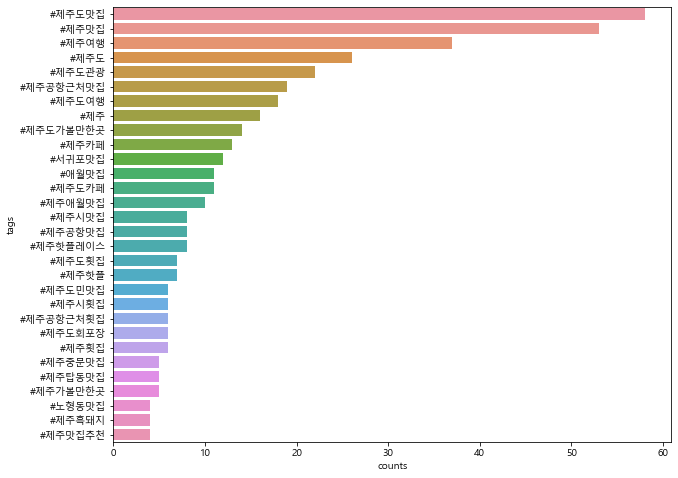

In [72]:
#막대 차트 그리기
plt.figure(figsize = (10, 8))
sns.barplot(x='counts', y='tags', data=tag_counts_df)

In [73]:
#워드 클라우드 그리기

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import platform

if platform.system() == 'Windows':
    font_path = "c:/Windows/Fonts/malgun.ttf"
elif platform.system() == 'Darwin':
    font_path = "/Users/$USER/Library/Fonts/AppleGothic.ttf"

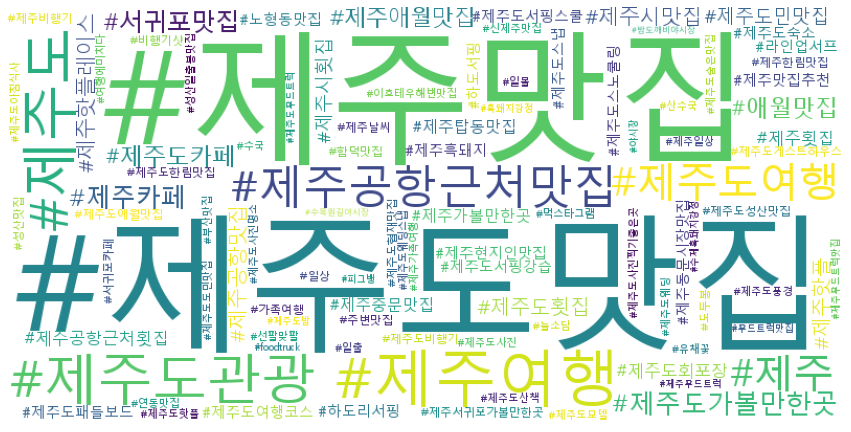

In [81]:
wordcloud = WordCloud(font_path = font_path,
                     background_color = 'white',
                     max_words = 100,
                     relative_scaling= 0.3,
                     width = 800,
                     height = 400
                     ).generate_from_frequencies(tag_counts_selected)
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./files/insta/tag_wordcloud.png')

In [17]:
import pandas as pd
raw_total = pd.read_excel('./files/insta/1_crawling_raw.xlsx')
raw_total.head()

,content,data,like,place,tags
0,제주공항에서 5분 개별룸이 많아서 더 좋고도민맛집으로 유명한 '연동대게회타운'개인룸...,2022-06-03,여러 명,NaN,"['#제주도맛집', '#제주맛집', '#제주공항근처맛집', '#제주시맛집', '#제..."
1,제철맞은 제주도갈치가 여기있네?🧡색달식당🧡매콤한 갈치조림과 고소한 갈치구이가 포인트...,2022-06-03,여러 명,NaN,"['#제주도맛집', '#제주맛집']"
2,(광고)제주공항근처 흑돼지와 갈비를 동시에 즐길수있는 맛집💛돈오름 숯불갈비💛때깔고운...,2022-06-03,여러 명,NaN,"['#제주도맛집', '#신제주맛집', '#연동맛집', '#제주공항맛집', '#제주도..."
3,⠀시시각각 변하는 인스타그램 시장업스타그램과 함께라면 걱정 없어요!⠀인기탭 노출부터...,2022-06-03,좋아요 115개,NaN,"['#제주맛집', '#제주도맛집']"
4,오늘 같은 날에 생각나는 갈치맛집🧡색달식당🧡중독적인 감칠맛이 살아있는 색달식당!😍연...,2022-06-03,여러 명,NaN,"['#제주도맛집', '#제주맛집']"


In [18]:
location_counts = raw_total['place'].value_counts( )
location_counts

제주도 제주                                                              14
Jeju-do                                                              4
라인업서프 하도                                                             3
환상의 섬 Jeju Island                                                    3
우도                                                                   2
Jeju Island, Korea                                                   2
제주도 서귀포                                                              2
아녜스의앞치마                                                              2
제주도 애월읍                                                              2
Jeju Island                                                          2
커피템플 - Jeju                                                          1
제주도                                                                  1
하루스시                                                                 1
제주도 해안도로                                                             1
한라수목원 

In [19]:
location_counts_df = pd.DataFrame(location_counts)
location_counts_df.head()

,place
제주도 제주,14
Jeju-do,4
라인업서프 하도,3
환상의 섬 Jeju Island,3
우도,2


In [20]:
location_counts_df.to_excel('./files/insta/3_location_counts.xlsx')

In [21]:
locations = list(location_counts.index)
locations

['제주도 제주',
 'Jeju-do',
 '라인업서프 하도',
 '환상의 섬 Jeju Island',
 '우도',
 'Jeju Island, Korea',
 '제주도 서귀포',
 '아녜스의앞치마',
 '제주도 애월읍',
 'Jeju Island',
 '커피템플 - Jeju',
 '제주도',
 '하루스시',
 '제주도 해안도로',
 '한라수목원',
 '고요새',
 '월정리해변',
 '뽀로로앤타요 테마파크 제주',
 '서귀포',
 'Holiday Diving Korea',
 '서부두수산시장',
 '한라산 삼각봉대피소',
 '부산송정해수욕장 Songjeong Beach, Busan, Korea',
 '하도해변',
 '한림 뽈살집',
 'Lmnt_jeju',
 '함덕첨밀밀',
 '에코랜드',
 '제주시한경면신창리',
 '송당리',
 '유우스테이',
 '제주도 여행',
 '관덕정',
 '깡촌흑돼지',
 'One and only - 원앤온리 제주',
 '카페치즈태비',
 '오션스타 리조트',
 '소길다방',
 '예술상점 꺄르르',
 '서귀포시 안덕면',
 '휴애리 자연생활공원',
 '해발1950m 한라산 백록담',
 '아기천사',
 "제주 그린데이 게스트하우스 'GreenDay' jeju guesthouse & backpackers & hostel",
 '은혜전복',
 '702왁싱',
 '어린왕자감귤밭',
 '제주도 한림',
 '픽스커피공단점_fixxcoffee',
 'Jeju-Do',
 'M1971 요트투어',
 '북촌에 가면',
 '제주 천제연폭포',
 '선흘리',
 '황금토종닭']

In [22]:
#카카오 로컬 API를 활용한 장소 검색 함수 만들기
import requests

def find_places(searching):
    # ① 접속URL 만들기
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(searching)
    
    # ② headers 입력하기
    headers = {
    "Authorization": "KakaoAK 07022cd510244c30f7879c45bc09d4ba"
    }
    
    # ③ API 요청&정보 받기
    places = requests.get(url, headers = headers).json()['documents']
    
    # ④ 필요한 정보 선택하기
    place = places[0] 
    name = place['place_name']
    x=place['x']
    y=place['y']
    data = [name, x, y, searching] 

    return data

In [23]:
data = find_places('제주공항')
data

['제주국제공항', '126.492769004244', '33.5070789578184', '제주공항']

In [24]:
#인스타그램 위치명에 대한 위치 정보 검색

import time
from tqdm.notebook import tqdm

locations_inform = [ ]
for location in tqdm(locations):
    try:
        data = find_places(location)
        locations_inform.append(data)
        time.sleep(0.5)
    except:
        pass
locations_inform

  0%|          | 0/55 [00:00<?, ?it/s]

[['제주도', '126.54587355630036', '33.379777816446165', '제주도 제주'],
 ['라인업서프 하도', '126.89212254317992', '33.510843660943884', '라인업서프 하도'],
 ['우도', '126.955582257582', '33.5044199749505', '우도'],
 ['올레길 7코스(서귀포-월평 올레)', '126.51530966206293', '33.23738579332568', '제주도 서귀포'],
 ['아녜스의앞치마', '126.80544507090276', '33.55553463811804', '아녜스의앞치마'],
 ['올레길 16코스(고내-광령 올레)', '126.38979561557086', '33.46649759191228', '제주도 애월읍'],
 ['제주도', '126.54587355630036', '33.379777816446165', 'Jeju Island'],
 ['제주도', '126.54587355630036', '33.379777816446165', '제주도'],
 ['하루스시', '127.0247675988396', '37.502942580245', '하루스시'],
 ['형제해안도로', '126.293352563779', '33.2167542093081', '제주도 해안도로'],
 ['한라수목원', '126.493266082832', '33.4697839260314', '한라수목원'],
 ['고요새', '126.58674033494978', '33.525515808076804', '고요새'],
 ['월정리해수욕장', '126.795805057888', '33.556469394054', '월정리해변'],
 ['뽀로로앤타요테마파크 제주',
  '126.37082203402295',
  '33.30041822583184',
  '뽀로로앤타요 테마파크 제주'],
 ['올레길 7코스(서귀포-월평 올레)', '126.51530966206293', '33.237385793

In [25]:
locations_inform_df = pd.DataFrame(locations_inform)
locations_inform_df.columns = ['name_official','경도','위도','인스타위치명']
locations_inform_df.to_excel('./files/insta/3_locations.xlsx', index=False)

In [26]:
location_counts_df = pd.read_excel('./files/insta/3_location_counts.xlsx', index_col = 0)
locations_inform_df = pd.read_excel('./files/insta/3_locations.xlsx')

In [27]:
location_data = pd.merge(locations_inform_df, location_counts_df, 
                         how = 'inner', left_on = 'name_official', right_index=True)

location_data.head()

,name_official,경도,위도,인스타위치명,place
0,제주도,126.545874,33.379778,제주도 제주,1
6,제주도,126.545874,33.379778,Jeju Island,1
7,제주도,126.545874,33.379778,제주도,1
1,라인업서프 하도,126.892123,33.510844,라인업서프 하도,3
2,우도,126.955582,33.504420,우도,2


In [28]:
location_data['name_official'].value_counts()

제주도           3
서부두수산시장       1
M1971 요트투어    1
한라산 삼각봉대피소    1
깡촌흑돼지         1
은혜전복          1
라인업서프 하도      1
아기천사          1
고요새           1
한라수목원         1
어린왕자감귤밭       1
하루스시          1
702왁싱         1
관덕정           1
예술상점 꺄르르      1
소길다방          1
하도해변          1
우도            1
카페치즈태비        1
아녜스의앞치마       1
유우스테이         1
황금토종닭         1
Name: name_official, dtype: int64

In [29]:
location_data = location_data.pivot_table(
    index = ['name_official', '경도', '위도'],
    values = 'place',
    aggfunc = 'sum')
location_data.head()

,,,place
name_official,경도,위도,
702왁싱,126.544087,33.492460,1
M1971 요트투어,126.257123,33.210124,1
고요새,126.586740,33.525516,1
관덕정,126.521457,33.513349,1
깡촌흑돼지,126.667135,33.541274,1


In [30]:
location_data.to_excel('./files/insta/3_location_inform.xlsx')

In [31]:
## folium을 이용한 지도 시각화 ① - 개별 표시
location_data = pd.read_excel('./files/insta/3_location_inform.xlsx')
location_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name_official  22 non-null     object 
 1   경도             22 non-null     float64
 2   위도             22 non-null     float64
 3   place          22 non-null     int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 832.0+ bytes


In [32]:
import folium

Mt_Hanla =[33.362500, 126.533694]
map_jeju = folium.Map(location = Mt_Hanla, zoom_start = 11)

for i in range(len(location_data)):
    name = location_data ['name_official'][i]    # 공식명칭
    count = location_data ['place'][i]           # 게시글 개수
    size = int(count)*2
    long = float(location_data['위도'][i])      
    lat = float(location_data['경도'][i])       
    folium.CircleMarker((long,lat), radius = size, color='red', popup=name).add_to(map_jeju)
    
map_jeju

In [19]:
map_jeju.save('./files/insta/3_jeju.html') 

In [33]:
from folium.plugins import MarkerCluster

locations = []
names = []

for i in range(len(location_data)):
    data = location_data.iloc[i]  # 행 하나씩
    locations.append((float(data['위도']),float(data['경도'])))    
    names.append(data['name_official'])


Mt_Hanla =[33.362500, 126.533694]
map_jeju2 = folium.Map(location = Mt_Hanla, zoom_start = 11)
                       
marker_cluster = MarkerCluster(
    locations=locations, popups=names,
    name='Jeju',
    overlay=True,
    control=True,

)

marker_cluster.add_to(map_jeju2)
folium.LayerControl().add_to(map_jeju2)

map_jeju2

In [21]:
map_jeju2.save('./files/insta/3_jeju_cluster.html') 

In [22]:
import pandas as pd
raw_total = pd.read_excel('./files/insta/1_crawling_raw.xlsx')

In [27]:
select_word = '제주여행'

check_list = [ ]
for content in raw_total['content']:
    if select_word in content:
        check_list.append(True)
    else:
        check_list.append(False)
        
select_df = raw_total[check_list]
select_df.head()

,content,data,like,place,tags
6,🤠카우보이 스테이크 하우스🤠이국적이고 고풍스러운 분위기의제주도 양식 찐 맛집💗아기자...,2022-06-03,여러 명,NaN,"['#제주도맛집', '#제주신화월드맛집', '#제주스테이크', '#오설록맛집', '..."
42,(광고)제주도에만 있다는 세젤예 수제마카롱집👀돌카롱는을 뗄 수 없는 갬성 비쥬얼에달...,2022-06-03,좋아요 3개,NaN,"['#돌카롱제주공항점✈☎064-722-5303📍제주', '#돌카롱사려니숲길점🌿☎06..."
43,(광고)따뜻한 봄날 제주에서 꼭 가봐야 한다는돌카롱감성 듬뿍담긴 마카로운 비쥬얼도 ...,2022-06-03,좋아요 97개,NaN,"['#돌카롱제주공항점✈☎064-722-5303📍제주', '#돌카롱사려니숲길점🌿☎06..."
49,*에코랜드 / 테마파크1800년대 증기기관차인 볼드윈 기종을 모델화하여 영국에서 수...,2022-05-29,좋아요 527개,에코랜드,"['#에코랜드', '#제미녀', '#제주여행', '#제주도여행', '#제주가족여행'..."
52,"*비자림로 / 거리,골목 팔하나 잘려나간듯한 비자림로.. 볼때마다 속상 주소 : 제...",2021-05-20,0,송당리,"['#비자림로', '#제주관광', '#제주도관광', '#제주가볼만한곳', '#제주도..."


In [28]:
for i in select_df.index:
    print(select_df.loc[i, 'content'])
    print('-'*50)
select_df.head()

🤠카우보이 스테이크 하우스🤠이국적이고 고풍스러운 분위기의제주도 양식 찐 맛집💗아기자기한 분위기에서 즐기는이국적인 음식들의 향현💞미국생활 하시다 오신 사장님의손맛으로 본토맛 뿜뿜😆육즙가득! 두툼한 스테이크랑꾸덕꾸덕 파스타 한입이면바로 외국여행온 기분 물씬✈✈매뉴 하나하나 다 맛있어서거를 타선이 없음 ㅠㅠ꼭 다 먹어봐야함👍👍제주여행 필수코스로내맘대로 지정해 버렸다💗💗🧭카우보이스테이크하우스064-792-1163제주 서귀포시 대정읍 영어도시로 77-5 1층#제주도맛집#제주신화월드맛집#제주스테이크#오설록맛집#오설록근처맛집#제주뽀로로테마파크맛집#제주카멜리아힐맛집#안덕면레스토랑#신화월드레스토랑#제주서쪽맛집#동광리맛집#더마파크맛집#제주981파크맛집#영어마을맛집#구억리맛집
--------------------------------------------------
(광고)제주도에만 있다는 세젤예 수제마카롱집👀돌카롱는을 뗄 수 없는 갬성 비쥬얼에달달한 맛+사랑스런 향에 벌써 기분좋아짐💛쫀득한 현무암모양 꼬끄에,빵빵한 필링까지 한입 와앙하면스트레스 사르륵…🙈여행선물로 넘나 찰떡임!!━━━━ 𝑑𝑜𝑙𝑐𝑎𝑟𝑜𝑛 ━━━━📷사진제공@s2_love_bkopen. 10:00~18:00#돌카롱제주공항점✈☎064-722-5303📍제주 제주시 서광로2길 27-2#돌카롱사려니숲길점🌿☎064-783-5261📍제주 제주시 조천읍 비자림로 422-2돌카롱 대표 계정 : @dolcaron#제주도카페#제주도기념품#제주카페추천#제주도선물#제주도가볼만한곳#제주도맛집#제주동쪽카페#제주카페#제주여행#제주핫플#제주명소#제주공항근처#제주도여행코스#돌하르방#제주디저트카페#제주살이 #제주공항근처맛집 #제주앓이#제주디저트#제주감성
--------------------------------------------------
(광고)따뜻한 봄날 제주에서 꼭 가봐야 한다는돌카롱감성 듬뿍담긴 마카로운 비쥬얼도 심쿵인데,쫀득한 식감까찌 취저…💘한라산이보이는넓은 들판도있어서 인생샷 남기기도 딱 📷@제주에 가야할 이유 찾았다!!━━━━ 𝑑

,content,data,like,place,tags
6,🤠카우보이 스테이크 하우스🤠이국적이고 고풍스러운 분위기의제주도 양식 찐 맛집💗아기자...,2022-06-03,여러 명,NaN,"['#제주도맛집', '#제주신화월드맛집', '#제주스테이크', '#오설록맛집', '..."
42,(광고)제주도에만 있다는 세젤예 수제마카롱집👀돌카롱는을 뗄 수 없는 갬성 비쥬얼에달...,2022-06-03,좋아요 3개,NaN,"['#돌카롱제주공항점✈☎064-722-5303📍제주', '#돌카롱사려니숲길점🌿☎06..."
43,(광고)따뜻한 봄날 제주에서 꼭 가봐야 한다는돌카롱감성 듬뿍담긴 마카로운 비쥬얼도 ...,2022-06-03,좋아요 97개,NaN,"['#돌카롱제주공항점✈☎064-722-5303📍제주', '#돌카롱사려니숲길점🌿☎06..."
49,*에코랜드 / 테마파크1800년대 증기기관차인 볼드윈 기종을 모델화하여 영국에서 수...,2022-05-29,좋아요 527개,에코랜드,"['#에코랜드', '#제미녀', '#제주여행', '#제주도여행', '#제주가족여행'..."
52,"*비자림로 / 거리,골목 팔하나 잘려나간듯한 비자림로.. 볼때마다 속상 주소 : 제...",2021-05-20,0,송당리,"['#비자림로', '#제주관광', '#제주도관광', '#제주가볼만한곳', '#제주도..."


In [29]:
fpath = f'./files/insta/4_select_data_{select_word}.xlsx'
select_df.to_excel(fpath)

In [31]:
select_word_list = ['제주여행','맛집','힐링','게스트하우스','애월']

for select_word in select_word_list:
    check_list = []
    for content in raw_total['content']:
        if select_word in content:
            check_list.append(True)
        else:
            check_list.append(False)

    select_df = raw_total[check_list]
    fpath = f'./files/insta/4_select_data_{select_word}.xlsx'
    select_df.to_excel(fpath)   